In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# arguments define
import argparse
from cgi import test

# load torch
import torchvision

# other utilities
# import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import numpy as np

#%% Load the training data
def MNIST_DATASET_TRAIN(downloads, train_amount):
    # Load dataset
    training_data = torchvision.datasets.MNIST(
              root = './mnist/',
              train = True,
              download = downloads,
              transform=torchvision.transforms.ToTensor()
        #       transform = torchvision.transforms.Compose([
        # torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize((0.1307,), (0.3081,))])
              
              )
    

    #Convert Training data to numpy
    train_data_raw = training_data.train_data.numpy()[:train_amount]
    train_label = training_data.train_labels.numpy()[:train_amount]
    
    # scalar = StandardScaler()
    # scalar.fit(train_data_raw)
    # train_data = scalar.transform(train_data_raw)

    train_data = train_data_raw/255.0
    #train_data = train_data_raw

    #Get part of the data
    train_data_new=[]
    train_label_new=[]
    cnt=0
    for i in range(len(train_label)):
        if train_label[i] in [0,1,2,3,4,5]:
            train_data_new.append(train_data[i])
            train_label_new.append(train_label[i])
            cnt+=1
    
    train_data_new=np.array(train_data_new)
    train_label_new=np.array(train_label_new)
    train_data_new.reshape(cnt,train_data.shape[1],train_data.shape[2])
    train_label_new.reshape(cnt)

    # Print training data size
    print('Training data size: ',train_data_new.shape)
    print('Training data label size:',train_label_new.shape)   
    # plt.imshow(train_data[0])
    # plt.show()

    return train_data_new, train_label_new

#%% Load the test data
def MNIST_DATASET_TEST(downloads, test_amount):
    # Load dataset
    testing_data = torchvision.datasets.MNIST(
              root = './mnist/',
              train = False,
        #       transform = torchvision.transforms.Compose([
        # torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize((0.1307,), (0.3081,))]),
              download = downloads,
              transform=torchvision.transforms.ToTensor()
              )
    
    # Convert Testing data to numpy
    test_data_raw = testing_data.test_data.numpy()[:test_amount]
    test_label = testing_data.test_labels.numpy()[:test_amount]
    
    test_data = test_data_raw/255.0
    # test_data = test_data_raw

    # Print training data size
    print('test data size: ',test_data.shape)
    print('test data label size:',test_label.shape)   
    # plt.imshow(test_data[0])
    # plt.show()
    
    
    test_data_known=[]
    test_label_known=[]
    test_data_unknown=[]
    test_label_unknown=[]
    kcnt=0
    ucnt=0
    for i in range(len(test_label)):
        if test_label[i] in [0,1,2,3,4,5]:
            test_data_known.append(test_data[i])
            test_label_known.append(test_label[i])
            kcnt+=1
        else:
            test_data_unknown.append(test_data[i])
            test_label_unknown.append(test_label[i])
            ucnt+=1

    
    test_data_known=np.array(test_data_known)
    test_label_known=np.array(test_label_known)
    test_data_unknown=np.array(test_data_unknown)
    test_label_unknown=np.array(test_label_unknown)
    test_data_known.reshape(kcnt,test_data.shape[1],test_data.shape[2])
    test_label_known.reshape(kcnt)
    test_data_unknown.reshape(ucnt,test_data.shape[1],test_data.shape[2])
    test_label_unknown.reshape(ucnt)
    
    
    return test_data_known, test_label_known,test_data_unknown,test_label_unknown, test_data, test_label

def RunSVM(clf,threshold):
    clf.fit(training_features, train_label)
    
    # Test on Training data
    
    train_result = clf.predict(training_features)

    # print(len(train_result))
    precision = sum(train_result == train_label)/train_label.shape[0]
    print('Training precision: ', precision)

    #Test on test data known
    test_result_proba = clf.predict_proba(test_features_k)
    test_result=[]
    for i in range(len(test_result_proba)):
        res=0
        mx=test_result_proba[i][0]
        for j in range(len(test_result_proba[i])):
            if mx<test_result_proba[i][j]:
                res=j
                mx=test_result_proba[i][j]
        if mx<threshold:
            res=-1        
        test_result.append(res)

    accurate=0
    for i in range(len(test_result)):
        if test_label_k[i] in [6,7,8,9]:
            if test_result[i]==-1:
                accurate+=1
        else:
            if test_result[i]==test_label_k[i]:
                accurate+=1
    precision = accurate/test_label_k.shape[0]
    print('Test precision (known): ', precision)
    

        #Test on test data all
    test_result_proba = clf.predict_proba(test_features)
    test_result=[]
    for i in range(len(test_result_proba)):
        res=0
        mx=test_result_proba[i][0]
        for j in range(len(test_result_proba[i])):
            if mx<test_result_proba[i][j]:
                res=j
                mx=test_result_proba[i][j]
        if mx<threshold:
            res=-1        
        test_result.append(res)

    accurate=0
    for i in range(len(test_result)):
        if test_label[i] in [6,7,8,9]:
            if test_result[i]==-1:
                accurate+=1
        else:
            if test_result[i]==test_label[i]:
                accurate+=1
    precision = accurate/test_label.shape[0]
    print('Test precision (mixed): ', precision)

#%% Main function for MNIST dataset    
if __name__=='__main__':

    # Training Arguments Settings
    # parser = argparse.ArgumentParser(description='Saak')
    # parser.add_argument('--download_MNIST', default=True, metavar='DL',
    #                     help='Download MNIST (default: True)')
    # parser.add_argument('--train_amount', type=int, default=60000,
    #                     help='Amount of training samples')
    # parser.add_argument('--test_amount', type=int, default=10000,
    #                     help='Amount of testing samples')
    # args = parser.parse_args()
    
    # # Print Arguments
    # print('\n----------Argument Values-----------')
    # for name, value in vars(args).items():
    #     print('%s: %s' % (str(name), str(value)))
    # print('------------------------------------\n')
    
    
    # Load Training Data & Testing Data
    train_data, train_label = MNIST_DATASET_TRAIN(True, 60000)
    test_data_k, test_label_k,test_data_u,test_label_u,test_data,test_label = MNIST_DATASET_TEST(True, 100000)

    training_features = train_data.reshape(len(train_label),-1)
    test_features_k = test_data_k.reshape(len(test_label_k),-1)
    test_features_u = test_data_u.reshape(len(test_label_u),-1)
    test_features = test_data.reshape(len(test_label),-1)


Training data size:  (36017, 28, 28)
Training data label size: (36017,)
test data size:  (10000, 28, 28)
test data label size: (10000,)


In [2]:
# Training SVM
    
# clf = svm.SVC(C=1.0,kernel='rbf',tol=0.5,max_iter=1000,probability=True,verbose=True)
print('------Training and testing SVM------')
print("C:{}, kernel:{}, tol:{}, threshold:{}".format(1.0,'rbf',0.5,0.95))
clf = svm.SVC(C=1.0,kernel='rbf',tol=0.5,max_iter=1000,probability=True,verbose=False)
RunSVM(clf,0.95)
#Show the confusion matrix
# matrix = confusion_matrix(test_label, test_result)


------Training and testing SVM------
C:1.0, kernel:rbf, tol:0.5, threshold:0.95
Training precision:  0.9950578893300386
Test precision (known):  0.9540706350522301
Test precision (mixed):  0.8776


In [2]:
print('------Training and testing SVM------')
print("C:{}, kernel:{}, tol:{}, threshold:{}".format(1.0,'rbf',0.1,0.95))
clf = svm.SVC(C=1.0,kernel='rbf',tol=0.1,max_iter=1000,probability=True,verbose=False)
RunSVM(clf,0.95)

------Training and testing SVM------
C:1.0, kernel:rbf, tol:0.1, threshold:0.95
Training precision:  0.9950578893300386
Test precision (known):  0.9548996849610346
Test precision (mixed):  0.8709


In [3]:
print('------Training and testing SVM------')
print("C:{}, kernel:{}, tol:{}, threshold:{}".format(0.5,'rbf',0.5,0.95))
clf = svm.SVC(C=0.5,kernel='rbf',tol=0.5,max_iter=1000,probability=True,verbose=False)
RunSVM(clf,0.95)

------Training and testing SVM------
C:0.5, kernel:rbf, tol:0.5, threshold:0.95
Training precision:  0.9907821306605215
Test precision (known):  0.9418006964019234
Test precision (mixed):  0.8714


In [4]:
print('------Training and testing SVM------')
print("C:{}, kernel:{}, tol:{}, threshold:{}".format(0.5,'rbf',2.0,0.85))
clf = svm.SVC(C=0.5,kernel='rbf',tol=2.0,max_iter=1000,probability=True,verbose=False)
RunSVM(clf,0.85)

------Training and testing SVM------
C:0.1, kernel:rbf, tol:1.5, threshold:0.9
Training precision:  0.9822028486548019
Test precision (known):  0.9219034985906152
Test precision (mixed):  0.7937


In [4]:
print('------Training and testing SVM------')
print("C:{}, kernel:{}, tol:{}, threshold:{}".format(1.0,'rbf',1,0.95))
clf = svm.SVC(C=1.0,kernel='rbf',tol=1,max_iter=1000,probability=True,verbose=False)
RunSVM(clf,0.95)

------Training and testing SVM------
C:1.0, kernel:rbf, tol:1, threshold:0.95
Training precision:  0.9955854179970569
Test precision (known):  0.9548996849610346
Test precision (mixed):  0.8534


In [5]:
print('------Training and testing SVM------')
print("C:{}, kernel:{}, tol:{}, threshold:{}".format(2.0,'rbf',0.5,0.95))
clf = svm.SVC(C=2.0,kernel='rbf',tol=0.5,max_iter=1000,probability=True,verbose=False)
RunSVM(clf,0.95)

------Training and testing SVM------
C:2.0, kernel:rbf, tol:0.5, threshold:0.95
Training precision:  0.9986672959991115
Test precision (known):  0.9618637041949926
Test precision (mixed):  0.8726


In [9]:
print('------Training and testing SVM------')
print("C:{}, kernel:{}, tol:{}, threshold:{}".format(0.5,'linear',1.0,0.85))
clf = svm.SVC(C=0.5,kernel='linear',tol=1.0,max_iter=1000,probability=True,verbose=False)
RunSVM(clf,0.85)

------Training and testing SVM------
C:0.5, kernel:linear, tol:1.0, threshold:0.85


/home/cabbage/.conda/envs/cs182/lib/python3.6/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training precision:  0.9148180026098787
Test precision (known):  0.7118222516995523
Test precision (mixed):  0.7107


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# arguments define
import argparse
from cgi import test

# load torch
import torchvision

# other utilities
# import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import numpy as np

#%% Load the training data
def MNIST_DATASET_TRAIN(downloads, train_amount):
    # Load dataset
    training_data = torchvision.datasets.MNIST(
              root = './mnist/',
              train = True,
              download = downloads,
              transform=torchvision.transforms.ToTensor()
        #       transform = torchvision.transforms.Compose([
        # torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize((0.1307,), (0.3081,))])
              
              )
    

    #Convert Training data to numpy
    train_data_raw = training_data.train_data.numpy()[:train_amount]
    train_label = training_data.train_labels.numpy()[:train_amount]
    
    # scalar = StandardScaler()
    # scalar.fit(train_data_raw)
    # train_data = scalar.transform(train_data_raw)

    train_data = train_data_raw/255.0
    #train_data = train_data_raw

    #Get part of the data
    train_data_new=[]
    train_label_new=[]
    cnt=0
    for i in range(len(train_label)):
        if train_label[i] in [0,1,2,3,4,5]:
            train_data_new.append(train_data[i])
            train_label_new.append(train_label[i])
            cnt+=1
    
    train_data_new=np.array(train_data_new)
    train_label_new=np.array(train_label_new)
    train_data_new.reshape(cnt,train_data.shape[1],train_data.shape[2])
    train_label_new.reshape(cnt)

    # Print training data size
    print('Training data size: ',train_data_new.shape)
    print('Training data label size:',train_label_new.shape)   
    # plt.imshow(train_data[0])
    # plt.show()

    return train_data_new, train_label_new

#%% Load the test data
def MNIST_DATASET_TEST(downloads, test_amount):
    # Load dataset
    testing_data = torchvision.datasets.MNIST(
              root = './mnist/',
              train = False,
        #       transform = torchvision.transforms.Compose([
        # torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize((0.1307,), (0.3081,))]),
              download = downloads,
              transform=torchvision.transforms.ToTensor()
              )
    
    # Convert Testing data to numpy
    test_data_raw = testing_data.test_data.numpy()[:test_amount]
    test_label = testing_data.test_labels.numpy()[:test_amount]
    
    test_data = test_data_raw/255.0
    # test_data = test_data_raw

    # Print training data size
    print('test data size: ',test_data.shape)
    print('test data label size:',test_label.shape)   
    # plt.imshow(test_data[0])
    # plt.show()
    
    
    test_data_known=[]
    test_label_known=[]
    test_data_unknown=[]
    test_label_unknown=[]
    kcnt=0
    ucnt=0
    for i in range(len(test_label)):
        if test_label[i] in [0,1,2,3,4,5]:
            test_data_known.append(test_data[i])
            test_label_known.append(test_label[i])
            kcnt+=1
        else:
            test_data_unknown.append(test_data[i])
            test_label_unknown.append(test_label[i])
            ucnt+=1

    
    test_data_known=np.array(test_data_known)
    test_label_known=np.array(test_label_known)
    test_data_unknown=np.array(test_data_unknown)
    test_label_unknown=np.array(test_label_unknown)
    test_data_known.reshape(kcnt,test_data.shape[1],test_data.shape[2])
    test_label_known.reshape(kcnt)
    test_data_unknown.reshape(ucnt,test_data.shape[1],test_data.shape[2])
    test_label_unknown.reshape(ucnt)
    
    
    return test_data_known, test_label_known,test_data_unknown,test_label_unknown, test_data, test_label

def train():
    global train_data,train_label,test_data_k, test_label_k,test_data_u,test_label_u,test_data,test_label,training_features,test_features_k,test_features_u,test_features
    train_data, train_label = MNIST_DATASET_TRAIN(True, 60000)
    test_data_k, test_label_k,test_data_u,test_label_u,test_data,test_label = MNIST_DATASET_TEST(True, 100000)

    training_features = train_data.reshape(len(train_label),-1)
    test_features_k = test_data_k.reshape(len(test_label_k),-1)
    test_features_u = test_data_u.reshape(len(test_label_u),-1)
    test_features = test_data.reshape(len(test_label),-1)
    clf.fit(training_features, train_label)

def RunSVM_new(clf,threshold):
    
    # Test on Training data
    global train_data,train_label,test_data_k, test_label_k,test_data_u,test_label_u,test_data,test_label,training_features,test_features_k,test_features_u,test_features
    
    train_result = clf.predict(training_features)

    # print(len(train_result))
    precision = sum(train_result == train_label)/train_label.shape[0]
    print('Training precision: ', precision)

    #Test on test data known
    test_result_proba = clf.predict_proba(test_features_k)
    test_result=[]
    for i in range(len(test_result_proba)):
        res=0
        mx=test_result_proba[i][0]
        for j in range(len(test_result_proba[i])):
            if mx<test_result_proba[i][j]:
                res=j
                mx=test_result_proba[i][j]
        if mx<threshold:
            res=-1        
        test_result.append(res)

    accurate=0
    for i in range(len(test_result)):
        if test_label_k[i] in [6,7,8,9]:
            if test_result[i]==-1:
                accurate+=1
        else:
            if test_result[i]==test_label_k[i]:
                accurate+=1
    precision = accurate/test_label_k.shape[0]
    print('Test precision (known): ', precision)
    
    #Test on test data all
    test_result_proba = clf.predict_proba(test_features_u)
    test_result=[]
    for i in range(len(test_result_proba)):
        res=0
        mx=test_result_proba[i][0]
        for j in range(len(test_result_proba[i])):
            if mx<test_result_proba[i][j]:
                res=j
                mx=test_result_proba[i][j]
        if mx<threshold:
            res=-1        
        test_result.append(res)

    accurate=0
    for i in range(len(test_result)):
        if test_label_u[i] in [6,7,8,9]:
            if test_result[i]==-1:
                accurate+=1
        else:
            if test_result[i]==test_label_u[i]:
                accurate+=1
    precision = accurate/test_label_u.shape[0]
    print('Test precision (unknown): ', precision)

        #Test on test data all
    test_result_proba = clf.predict_proba(test_features)
    test_result=[]
    for i in range(len(test_result_proba)):
        res=0
        mx=test_result_proba[i][0]
        for j in range(len(test_result_proba[i])):
            if mx<test_result_proba[i][j]:
                res=j
                mx=test_result_proba[i][j]
        if mx<threshold:
            res=-1        
        test_result.append(res)

    accurate=0
    for i in range(len(test_result)):
        if test_label[i] in [6,7,8,9]:
            if test_result[i]==-1:
                accurate+=1
        else:
            if test_result[i]==test_label[i]:
                accurate+=1
    precision = accurate/test_label.shape[0]
    print('Test precision (mixed): ', precision)

#%% Main function for MNIST dataset    
if __name__=='__main__':

    # Training Arguments Settings
    # parser = argparse.ArgumentParser(description='Saak')
    # parser.add_argument('--download_MNIST', default=True, metavar='DL',
    #                     help='Download MNIST (default: True)')
    # parser.add_argument('--train_amount', type=int, default=60000,
    #                     help='Amount of training samples')
    # parser.add_argument('--test_amount', type=int, default=10000,
    #                     help='Amount of testing samples')
    # args = parser.parse_args()
    
    # # Print Arguments
    # print('\n----------Argument Values-----------')
    # for name, value in vars(args).items():
    #     print('%s: %s' % (str(name), str(value)))
    # print('------------------------------------\n')
    
    
    # Load Training Data & Testing Data
    pass
    

In [4]:
print("C:{}, kernel:{}, tol:{}, threshold:{}".format(1.0,'rbf',0.5,0.95))
clf = svm.SVC(C=1.0,kernel='rbf',tol=0.5,max_iter=1000,probability=True,verbose=False)
train()

C:1.0, kernel:rbf, tol:0.5, threshold:0.95
Training data size:  (36017, 28, 28)
Training data label size: (36017,)
test data size:  (10000, 28, 28)
test data label size: (10000,)


/home/cabbage/.conda/envs/cs182-svm/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/cabbage/.conda/envs/cs182-svm/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/cabbage/.conda/envs/cs182-svm/lib/python3.6/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/cabbage/.conda/envs/cs182-svm/lib/python3.6/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [3]:
print('------Testing SVM------')

RunSVM_new(clf,0.97)

------Testing SVM------


NameError: name 'clf' is not defined

In [15]:
print('------Testing SVM------')

RunSVM_new(clf,0.96)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.9474382357817941
Test precision (unknown):  0.7898715041572184
Test precision (mixed):  0.8849


In [22]:
print('------Testing SVM------')

RunSVM_new(clf,1.00)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.0
Test precision (unknown):  1.0
Test precision (mixed):  0.3969


In [ ]:
print('------Testing SVM------')

RunSVM_new(clf,0.998)

In [1]:
print('------Testing SVM------')

RunSVM_new(clf,0.995)

------Testing SVM------


NameError: name 'RunSVM_new' is not defined

In [23]:
print('------Testing SVM------')

RunSVM_new(clf,0.99)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.8938816116730227
Test precision (unknown):  0.9342403628117913
Test precision (mixed):  0.9099


In [24]:
print('------Testing SVM------')

RunSVM_new(clf,0.98)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.9283700878792903
Test precision (unknown):  0.8765432098765432
Test precision (mixed):  0.9078


In [6]:
print('------Testing SVM------')

RunSVM_new(clf,0.95)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.9539048250704693
Test precision (unknown):  0.7616528092718569
Test precision (mixed):  0.8776


In [19]:
print('------Testing SVM------')

RunSVM_new(clf,0.90)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.9684961034654286
Test precision (unknown):  0.635928445452255
Test precision (mixed):  0.8365


In [16]:
print('------Testing SVM------')

RunSVM_new(clf,0.85)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.9756259326811474
Test precision (unknown):  0.5487528344671202
Test precision (mixed):  0.8062


In [18]:
print('------Testing SVM------')

RunSVM_new(clf,0.80)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.9801028021886917
Test precision (unknown):  0.47467876039304613
Test precision (mixed):  0.7795


In [8]:
print('------Testing SVM------')

RunSVM_new(clf,0.75)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.9834190018239098
Test precision (unknown):  0.41169060216679265
Test precision (mixed):  0.7565


In [9]:
print('------Testing SVM------')

RunSVM_new(clf,0.65)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.9862377715138452
Test precision (unknown):  0.29881582262534645
Test precision (mixed):  0.7134


In [10]:
print('------Testing SVM------')

RunSVM_new(clf,0.55)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.989719781130824
Test precision (unknown):  0.18568909045099521
Test precision (mixed):  0.6706


In [11]:
print('------Testing SVM------')

RunSVM_new(clf,0.45)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.9912120709666722
Test precision (unknown):  0.08289241622574955
Test precision (mixed):  0.6307


In [12]:
print('------Testing SVM------')

RunSVM_new(clf,0.35)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.9917095009119549
Test precision (unknown):  0.0163769211388259
Test precision (mixed):  0.6046


In [13]:
print('------Testing SVM------')

RunSVM_new(clf,0.25)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.9918753108937158
Test precision (unknown):  0.0007558578987150416
Test precision (mixed):  0.5985


In [14]:
print('------Testing SVM------')

RunSVM_new(clf,0.15)

------Testing SVM------
Training precision:  0.9950578893300386
Test precision (known):  0.9918753108937158
Test precision (unknown):  0.0
Test precision (mixed):  0.5982


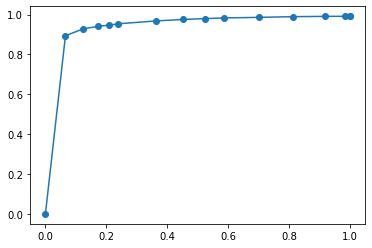

0.9369524150418103


In [26]:
#SVM
import matplotlib.pyplot as plt

a=[0                 ,0.0007558578987150416,0.0163769211388259, 0.08289241622574955, 0.18568909045099521,0.29881582262534645, 0.41169060216679265, 0.47467876039304613,0.5487528344671202, 0.635928445452255 ,0.7616528092718569,0.7898715041572184,0.8284202569916855,0.8765432098765432,0.9342403628117913,1]
b=[0.9918753108937158,0.9918753108937158   ,0.9917095009119549, 0.9912120709666722 , 0.989719781130824  ,0.9862377715138452 , 0.9834190018239098 , 0.9801028021886917 ,0.9756259326811474, 0.9684961034654286,0.9539048250704693,0.9474382357817941,0.940805836511358,0.9283700878792903,0.8938816116730227, 0]

for i in range(len(a)):
    a[i]=1-a[i]

a.reverse()
b.reverse()
plt.scatter(a,b)
plt.plot(a,b)

s=0.0
for i in range(1,len(a)):
    width=a[i]-a[i-1]
    s+=(b[i-1]+b[i])*width/2

plt.show()
print(s)

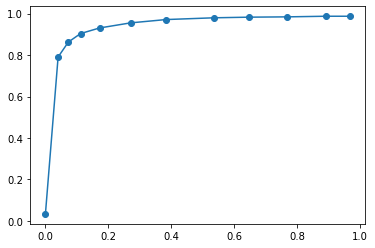

0.9073842907533384


In [27]:
#CNN
import matplotlib.pyplot as plt

a=[0.03325774754346183,0.11035525321239607,0.23406399596875788,0.35424540186444947,0.4653565129755606,0.6170319979843789,0.7296548248929201,0.8279163517258755,0.8883849836230788,0.927185689090451,0.9596875787351978,1.0]
b=[0.987,0.987,0.984,0.9825,0.9795,0.971,0.955,0.9305,0.9035,0.8625,0.7905,0.034]

for i in range(len(a)):
    a[i]=1-a[i]

a.reverse()
b.reverse()
plt.scatter(a,b)
plt.plot(a,b)

s=0.0
for i in range(1,len(a)):
    width=a[i]-a[i-1]
    s+=(b[i-1]+b[i])*width/2

plt.show()
print(s)